# Cooking for dummies

# Abstract
Eating is one of the core actions we do everyday. But cooking does not seem to be as core as eating, as precooked food seem to be more popular than ever. Moreover, with the restructuring of the society in terms of gender, cooking lessons are now meant for specialists that intend to work as cooks. Because of that, people don't necessarily know how to cook anymore.
Still, eating healthy and at a moderate price requires some cooking. How to combine the leftovers in your fridge? What are the most recommended spices to cook your Thanksgiving's turkey?
Our goal is to provide a very easy way to see which ingredients go along with which, and provide **simple food combinations** that are often used together, and to illustrate the **synergies between ingredients**.

In [7]:
import os
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt

%matplotlib inline

### Dataset

We take our data from:
* Cooking recipes: infolab.stanford.edu/~west1/from-cookies-to-cooks/recipePages.zip 
* infolab.stanford.edu/~west1/from-cookies-to-cooks/recipeInfo.tar.gz

In [2]:
if("reload" not in globals()):
    reload = True
    
if(reload):
    db = pd.read_excel('recipeInfo/recipeInfo.xls',encoding='utf8')
    
    db2 = db.dropna(subset=['ingredients_bag-of-words'],axis=0)
    ds_bag = db2['ingredients_bag-of-words'].apply(lambda x :[s for s in x.split(' ') if s.isalpha()])
    
    reload = False
    
db2.head()

,domain,url,kcal_total,kcal_carb,kcal_fat,kcal_protein,mg_sodium,mg_cholesterol,title,title_bag-of-words,ingredients_list,ingredients_bag-of-words
0,recipes.sparkpeople.com,http://recipes.sparkpeople.com/recipe-detail.a...,257.1,220,7.2,21.2,95.4,2.5,Easy Light Chocolate Milkshake Recipe,chocolate easy light milkshake recipe,"put one half cup of milk, 4 tablespoons of cho...","! , . 4 ? and are blend chocolate cup enjoy ex..."
1,foodnetwork.com,http://www.foodnetwork.com/recipes/rachael-ray...,?,?,?,?,?,?,Lamb Stew Recipe : : Recipes : Food Network,: food lamb network recipe recipes stew,5 yellow onions|2 turnips|5 carrots|1 stalk fe...,", 1 1\/2 1\/4 1\/8 1 1\/2 2 3 5 and anise appl..."
2,foodnetwork.com,http://www.foodnetwork.com/recipes/paula-deen/...,?,?,?,?,?,?,Chocolate Bread Pudding Recipe : Paula Deen : ...,: bread chocolate deen food network paula pudd...,"1 (1-pound) loaf French or Italian bread, cube...",", -lrb- -rrb- 1 1-pound 1\/2 1\/4 1 1\/2 2 3 6..."
3,cdkitchen.com,http://www.cdkitchen.com/recipes/recs/32/Snowb...,?,?,?,?,?,?,Snowball Cookies II Recipe,cookies ii recipe snowball,1/2 cup powdered sugar|1/3 cup butter or marga...,1 1\/2 1\/3 2 almond baking bisquick butter ch...
4,cdkitchen.com,http://www.cdkitchen.com/recipes/recs/38/Old_F...,192,120,63,12,?,?,Old Fashioned Butterscotch Pie Recipe #31698,# 31698 butterscotch fashioned old pie recipe,1 1/2 cup brown sugar|1 cup water|3 eggs|4 tab...,1 1\/2 1\/4 1 1\/2 3 4 brown butter cream cup ...


This data represents recipes gathered from several cooking websites. It contains recipes entries with info such as the calories (fat,proteins,carb) and the ingredients. Our main focus will be the ingredients list of each recipe, from which we intend to collect an exhaustive list of ingredients.

We mainly focus on the column **bag of words** to start our exploratory analysis on the data. Note that for our project we are especially interested in the **ingredients**, the reason why we focus our study on this point.

### Exploratory analysis

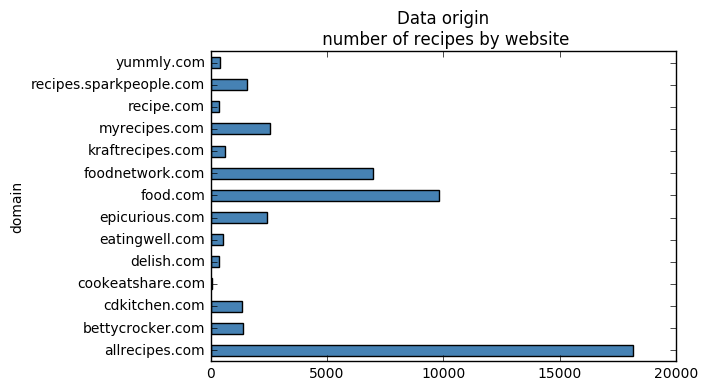

In [16]:
db2.groupby(db2['domain'])['url'].count().plot.barh(title="Data origin\n number of recipes by website", color=['steelblue'])
plt.show()

We first have a look at the origin of the data: it mostly comes from 3 websites (*allrecipes.com*, *food.com* and *foodnetwork.com*).

Note that we **do not** look at the data in kcal_total, kcal_carb, kcal_fat, kcal_protein, mg_sodium, mg_cholesterol because it is simply not what we use for our project.

In [46]:
# we use collections to handle the words and their occurencies


# contains all the words used in the recipes
unique_words = collections.Counter()
for recipe_words in ds_bag.values:
    unique_words.update(recipe_words)

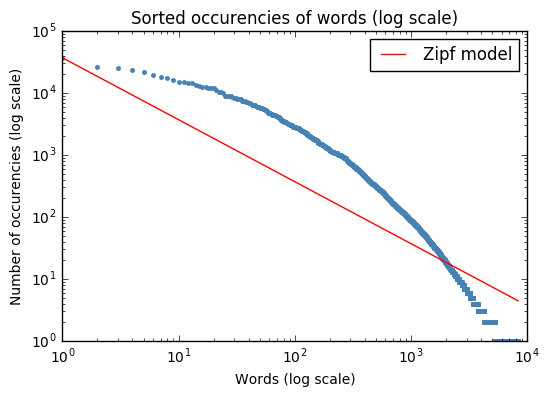

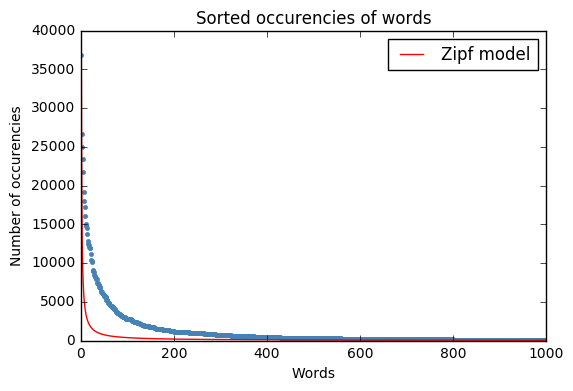

In [83]:
X = [x+1 for x in range(len(unique_words))]
Y = [y for (_,y) in unique_words.most_common(len(unique_words))]
Y2 = [ Y[0]/(x+1) for x in range(len(unique_words))]

plt.figure()
plt.loglog(X,Y,'.', color='steelblue')
plt.loglog(X,Y2, color='red', label='Zipf model') # Zipf estimate
plt.xlabel('Words (log scale)')
plt.ylabel('Number of occurencies (log scale)')
plt.title('Sorted occurencies of words (log scale)')
plt.legend()
plt.show()

plt.figure()
plt.plot(X[:1000],Y[:1000],'.', color='steelblue')
plt.plot(X[:1000],Y2[:1000], color='red', label='Zipf model') # Zipf estimate
plt.xlabel('Words')
plt.ylabel('Number of occurencies')
plt.title('Sorted occurencies of words')
plt.legend()
plt.show()

We look at the occurencies of words. Considering that it is a large amount of textual data, we could expect our word distribution to respect the **Zipf Law** (https://en.wikipedia.org/wiki/Zipf%27s_law). It states that if we sort the words by their frequencies (*w_1*,...,*w_N*) such that *f_1*>...*f_N*, they will respect an inverse distribution: *f_i*=*1/i* for all *i*.

On this **logarithmic scale**, we observe that our distribution is relatively different. The frequencies do not decrease so sharply, and there is a smoother distribution of frequencies.

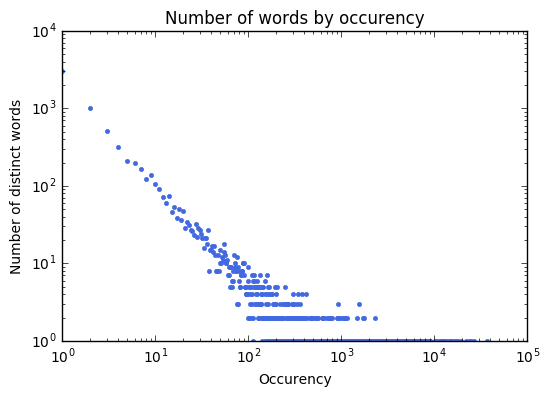

In [67]:
# contains the number of words by occurency
sorted_words = dict()

for key in unique_words:
    if(unique_words[key] in sorted_words):
        sorted_words[unique_words[key]].append(key)
    else:
        sorted_words[unique_words[key]] = [key]
        
nb_words = {i:len(sorted_words[i]) for i in sorted_words}

plt.figure()
X = list(nb_words.keys())
Y = list(nb_words.values())
plt.loglog(X,Y,'.',color='royalblue')
plt.xlabel('Occurency')
plt.ylabel('Number of distinct words')
plt.title('Number of words by occurency')
plt.show()

In this graph, we illustrate how **a lot of words are used a few times**, while for a high occurency only a few words are used that many often.

This also means that at some point we will have to decide if it reasonable to keep ingredients that are only mentioned one rare time, in order to decrease the size of the data.

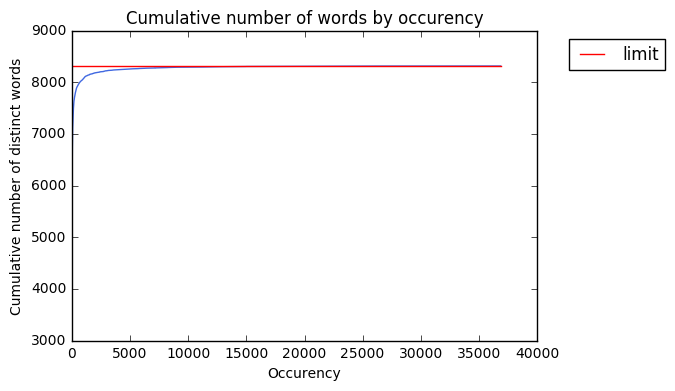

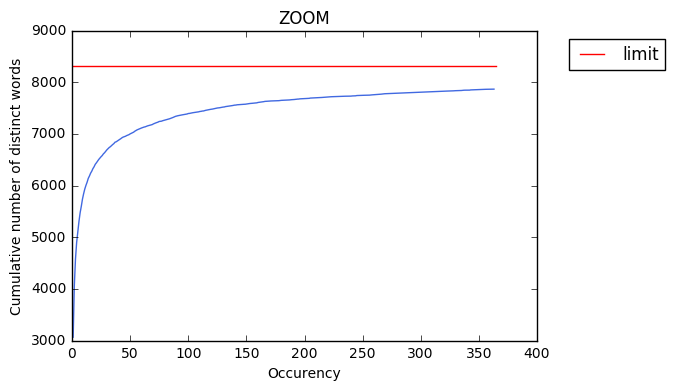

In [89]:
# contains the number of words that occured less than the given occurency
nb_words_sort = sorted(list(nb_words.items()))
cum_distinct = [nb_words_sort[0]]
for (i,nb) in nb_words_sort[1:]:
    cum_distinct.append((i,nb + cum_distinct[-1][1]))
    
plt.figure()
X = [ind for (ind,val) in cum_distinct]
Y = [val for (ind,val) in cum_distinct]
plt.plot(X,Y,color='royalblue')
plt.plot((1,X[-1]),(Y[-1],Y[-1]), color='red', label='limit')
plt.xlabel("Occurency")
plt.ylabel("Cumulative number of distinct words")
plt.title('Cumulative number of words by occurency')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

plt.figure()
plt.plot(X[:300],Y[:300],color='royalblue')
plt.plot((1,X[300]),(Y[-1],Y[-1]), color='red', label='limit')
plt.xlabel("Occurency")
plt.ylabel("Cumulative number of distinct words")
plt.title('ZOOM')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

On this graph we observe that the number of words with less than a given number of occurencies quickly converges to its limit, meaning that **there are few words with a lot of occurencies**.

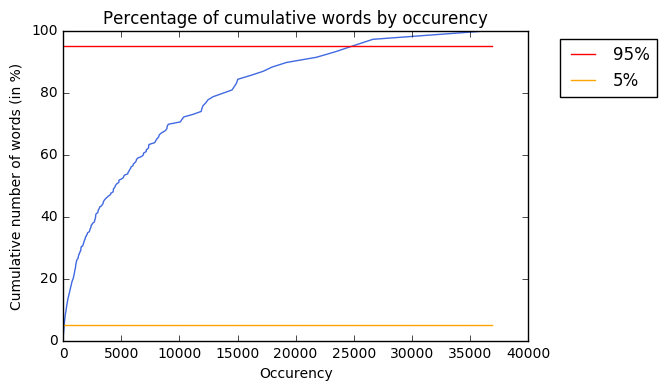

In [93]:
# We now plot the percentage increase of the previous plot
words_by_occ = []
for i in nb_words:
    words_by_occ.append((i,nb_words[i]*i))

words_by_occ.sort()

cum_words = [words_by_occ[0]]
for (i,nb) in words_by_occ[1:]:
    cum_words.append((i,nb+cum_words[-1][1]))

plt.figure()
X = [ind for (ind,val) in cum_words]
Y = [val/cum_words[-1][-1]*100 for (ind,val) in cum_words]
plt.plot(X,Y,color='royalblue')
plt.plot((1,X[-1]),(95,95), color='red', label='95%')
plt.plot((1,X[-1]),(5,5), color='orange', label='5%')
plt.xlabel("Occurency")
plt.ylabel("Cumulative number of words (in %)")
plt.title('Percentage of cumulative words by occurency')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


We finally display the increase of percentage of cumulative words by occurency.
The lines indicate the extreme *10%*. We observe that the first *5%* are quickly reached, underlying once again that we have a huge quantity of words that appear once. The last *5%* are reached after *2/3* of the higher occurency, meaning that we are left with a non-negligible portion of words that are often used and among which we may need to **manually remove** the words that are not related to the ingredients ('cup', 'teaspoon',...).

### Plans for the future

As mentioned previously, we would need to start by cleaning the data: as the study shows, we cannot easily cut off the words with the most occurencies: even if 'cup' is one of them, so is 'sugar'. Our best idea is to manually remove the non-ingredients words.

Then we would create a database based on what we observe in the original database: Let *N* bet the total number of ingredients.
* There are N entries, one for each ingredient
* There is one column indicating the food type: we would like to avoid having salt appearing as a main synergy for half of the ingredients
* The N next columns would contain shared occurencies: for entry *i* and column *j*, the value corresponds to the number of recipes in which both *i* and *j* are used.

The next step is to create a basic website on which we could query the database: a query would be: *ingredient1*, and the output would be:
*ingredient1* has a strong synergy with *ingredient2*,*ingredient3*,...
In particular *ingredient1*,*ingredient2*,*ingredient5* is a great combination,
as well as *ingredient1*,*ingredient3*,*ingredient6*.
Another interesting option would be to query several ingredients.
Here are all the options we would like to implement:
* look only for 1 good accompanying food **/** look for synergies with multiple ingredients
* query for several ingredients
* specify what kind of accompanying food you are looking for (meat,fruit,spices,...)

The website would most certainly hosted on GitHub Pages.